<a href="https://colab.research.google.com/github/AkashSinghrajpoot/A.I-system-Control-chatbot/blob/main/collegedeepprojed2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math

import librosa as lb # https://librosa.github.io/librosa/
import soundfile as sf # https://pysoundfile.readthedocs.io/en/latest/

import os

import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vbookshelf/respiratory-sound-database")

print("Path to dataset files:", path)

100%|██████████| 3.69G/3.69G [00:42<00:00, 92.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2


In [2]:
!ls ../root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2

demographic_info.txt  respiratory_sound_database  Respiratory_Sound_Database


In [3]:
#load patient diagnosis.csv

diag_csv = '../root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2/demographic_info.txt'
# Read the file with space delimiter and provide names for all columns
diagnosis = pd.read_csv(diag_csv, sep=' ', names=['pId', 'age', 'sex', 'bmi', 'column_NA', 'diagnosis'])

# Select only the pId and diagnosis columns
diagnosis = diagnosis[['pId', 'diagnosis']]

diagnosis.head()

,pId,diagnosis
0,101,99.0
1,102,73.0
2,103,NaN
3,104,NaN
4,105,135.0


In [4]:
ds = diagnosis['diagnosis'].unique()
ds

array([ 99. ,  73. ,   nan, 135. ,  64. ,  94. , 170. , 125. ,  80. ,
        98. , 119. ,  97. , 110. , 104. ,  68. , 100. ,  70. ,  74. ,
       183. , 103. ,  85. ,  86.4, 133. , 136. ,  71. ,  86. ,  87. ,
        92. , 117. ,  76. , 118. ,  78. , 143. ])

In [5]:
audio_text_loc = '../root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'
files = [s.split('.')[0] for s in os.listdir(path = audio_text_loc) if '.txt' in s and s not in ['filename_differences.txt', 'filename_format.txt']]
files

['124_1b1_Ar_sc_Litt3200',
 '166_1p1_Ll_sc_Meditron',
 '130_3b4_Lr_mc_AKGC417L',
 '160_1b4_Ar_mc_AKGC417L',
 '150_1b2_Al_sc_Meditron',
 '149_1b1_Al_sc_Meditron',
 '203_1p3_Al_mc_AKGC417L',
 '172_1b3_Ar_mc_AKGC417L',
 '163_8b3_Ll_mc_AKGC417L',
 '158_1p3_Ll_mc_AKGC417L',
 '170_2b2_Pl_mc_AKGC417L',
 '216_1b1_Al_sc_Meditron',
 '145_3b2_Ar_mc_AKGC417L',
 '154_2b4_Tc_mc_AKGC417L',
 '151_3p3_Ll_mc_AKGC417L',
 '200_2p3_Tc_mc_AKGC417L',
 '158_1p2_Ll_mc_AKGC417L',
 '170_1b2_Al_mc_AKGC417L',
 '186_2b3_Ar_mc_AKGC417L',
 '160_1b4_Tc_mc_AKGC417L',
 '170_1b2_Pl_mc_AKGC417L',
 '178_1b6_Pr_mc_AKGC417L',
 '130_3b4_Pr_mc_AKGC417L',
 '151_3p2_Al_mc_AKGC417L',
 '145_3b2_Lr_mc_AKGC417L',
 '180_1b4_Lr_mc_AKGC417L',
 '166_1p1_Al_sc_Meditron',
 '133_2p3_Ar_mc_AKGC417L',
 '135_2b2_Ar_mc_LittC2SE',
 '203_1p3_Pr_mc_AKGC417L',
 '134_2b3_Ar_mc_LittC2SE',
 '124_1b1_Pl_sc_Litt3200',
 '205_1b3_Ar_mc_AKGC417L',
 '158_1p2_Pr_mc_AKGC417L',
 '178_1b6_Pl_mc_AKGC417L',
 '140_2b3_Tc_mc_LittC2SE',
 '134_2b2_Ar_mc_LittC2SE',
 

In [6]:
def tokenize_file(filename):
    return filename.split('_')

In [7]:
files_ = []
for f in files:
    df = pd.read_csv(audio_text_loc + '/' + f + '.txt', sep='\t', names=['start', 'end', 'crackles', 'wheezes'])
    df['filename'] = f
    #get filename features
    f_features = tokenize_file(f)
    df['pId'] = f_features[0]
    # Check if index 3 exists before accessing it
    df['ac_mode'] = f_features[3] if len(f_features) > 3 else None

    files_.append(df)

files_df = pd.concat(files_)
files_df.reset_index(drop=True, inplace=True)
files_df.head()

,start,end,crackles,wheezes,filename,pId,ac_mode
0,0.71479,2.0065,0,1,124_1b1_Ar_sc_Litt3200,124,sc
1,2.00650,3.3853,0,1,124_1b1_Ar_sc_Litt3200,124,sc
2,3.38530,4.5827,0,1,124_1b1_Ar_sc_Litt3200,124,sc
3,4.58270,5.6821,0,1,124_1b1_Ar_sc_Litt3200,124,sc
4,5.68210,6.9447,0,1,124_1b1_Ar_sc_Litt3200,124,sc


In [8]:
print(os.listdir(audio_text_loc))

['133_2p3_Tc_mc_AKGC417L.wav', '129_1b1_Ar_sc_Meditron.wav', '219_2b2_Tc_mc_LittC2SE.wav', '124_1b1_Ar_sc_Litt3200.txt', '166_1p1_Ll_sc_Meditron.txt', '130_3b4_Lr_mc_AKGC417L.txt', '160_1b4_Ar_mc_AKGC417L.txt', '198_1b5_Tc_mc_AKGC417L.wav', '151_3p2_Pr_mc_AKGC417L.wav', '203_1p4_Pl_mc_AKGC417L.wav', '150_1b2_Al_sc_Meditron.txt', '149_1b1_Al_sc_Meditron.txt', '203_1p3_Al_mc_AKGC417L.txt', '165_1b1_Pr_sc_Meditron.wav', '172_1b3_Ar_mc_AKGC417L.txt', '205_1b3_Pl_mc_AKGC417L.wav', '205_4b2_Pl_mc_AKGC417L.wav', '163_8b3_Ll_mc_AKGC417L.txt', '207_2b3_Al_mc_AKGC417L.wav', '114_1b4_Al_mc_AKGC417L.wav', '198_1b5_Pr_mc_AKGC417L.wav', '158_1p3_Ll_mc_AKGC417L.txt', '151_2p2_Tc_mc_AKGC417L.wav', '170_2b2_Pl_mc_AKGC417L.txt', '216_1b1_Al_sc_Meditron.txt', '145_3b2_Ar_mc_AKGC417L.txt', '120_1b1_Al_sc_Meditron.wav', '170_2b2_Pr_mc_AKGC417L.wav', '157_1b1_Ar_sc_Meditron.wav', '154_2b4_Tc_mc_AKGC417L.txt', '151_3p3_Ll_mc_AKGC417L.txt', '200_2p3_Tc_mc_AKGC417L.txt', '130_3p3_Tc_mc_AKGC417L.wav', '158_1p2_

In [9]:
files_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   start     6898 non-null   float64
 1   end       6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   wheezes   6898 non-null   int64  
 4   filename  6898 non-null   object 
 5   pId       6898 non-null   object 
 6   ac_mode   6898 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 377.4+ KB


In [10]:
print(os.listdir(audio_text_loc))

['133_2p3_Tc_mc_AKGC417L.wav', '129_1b1_Ar_sc_Meditron.wav', '219_2b2_Tc_mc_LittC2SE.wav', '124_1b1_Ar_sc_Litt3200.txt', '166_1p1_Ll_sc_Meditron.txt', '130_3b4_Lr_mc_AKGC417L.txt', '160_1b4_Ar_mc_AKGC417L.txt', '198_1b5_Tc_mc_AKGC417L.wav', '151_3p2_Pr_mc_AKGC417L.wav', '203_1p4_Pl_mc_AKGC417L.wav', '150_1b2_Al_sc_Meditron.txt', '149_1b1_Al_sc_Meditron.txt', '203_1p3_Al_mc_AKGC417L.txt', '165_1b1_Pr_sc_Meditron.wav', '172_1b3_Ar_mc_AKGC417L.txt', '205_1b3_Pl_mc_AKGC417L.wav', '205_4b2_Pl_mc_AKGC417L.wav', '163_8b3_Ll_mc_AKGC417L.txt', '207_2b3_Al_mc_AKGC417L.wav', '114_1b4_Al_mc_AKGC417L.wav', '198_1b5_Pr_mc_AKGC417L.wav', '158_1p3_Ll_mc_AKGC417L.txt', '151_2p2_Tc_mc_AKGC417L.wav', '170_2b2_Pl_mc_AKGC417L.txt', '216_1b1_Al_sc_Meditron.txt', '145_3b2_Ar_mc_AKGC417L.txt', '120_1b1_Al_sc_Meditron.wav', '170_2b2_Pr_mc_AKGC417L.wav', '157_1b1_Ar_sc_Meditron.wav', '154_2b4_Tc_mc_AKGC417L.txt', '151_3p3_Ll_mc_AKGC417L.txt', '200_2p3_Tc_mc_AKGC417L.txt', '130_3p3_Tc_mc_AKGC417L.wav', '158_1p2_

In [11]:
files_df['pId'] = files_df['pId'].astype('float64')
files_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   start     6898 non-null   float64
 1   end       6898 non-null   float64
 2   crackles  6898 non-null   int64  
 3   wheezes   6898 non-null   int64  
 4   filename  6898 non-null   object 
 5   pId       6898 non-null   float64
 6   ac_mode   6898 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 377.4+ KB


In [12]:
files_df = pd.merge(files_df, diagnosis, on='pId')
files_df.head()

,start,end,crackles,wheezes,filename,pId,ac_mode,diagnosis
0,0.71479,2.0065,0,1,124_1b1_Ar_sc_Litt3200,124.0,sc,NaN
1,2.00650,3.3853,0,1,124_1b1_Ar_sc_Litt3200,124.0,sc,NaN
2,3.38530,4.5827,0,1,124_1b1_Ar_sc_Litt3200,124.0,sc,NaN
3,4.58270,5.6821,0,1,124_1b1_Ar_sc_Litt3200,124.0,sc,NaN
4,5.68210,6.9447,0,1,124_1b1_Ar_sc_Litt3200,124.0,sc,NaN


In [13]:
def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data)
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]

In [14]:
files_df['len_per_slice'] = files_df['end'].sub(files_df['start'], axis = 0)
max_len_per_slice = max(files_df['len_per_slice'])
max_len_per_slice

16.163

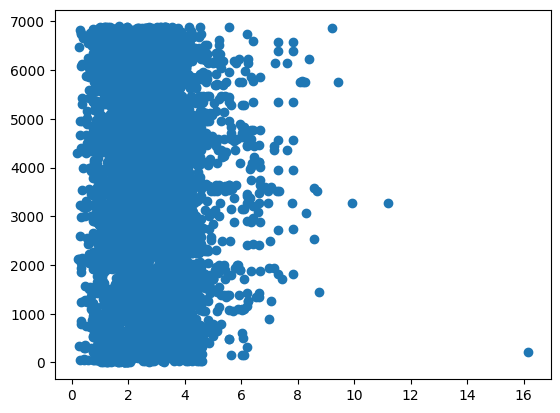

In [15]:
plt.scatter(files_df['len_per_slice'], y=files_df.index)

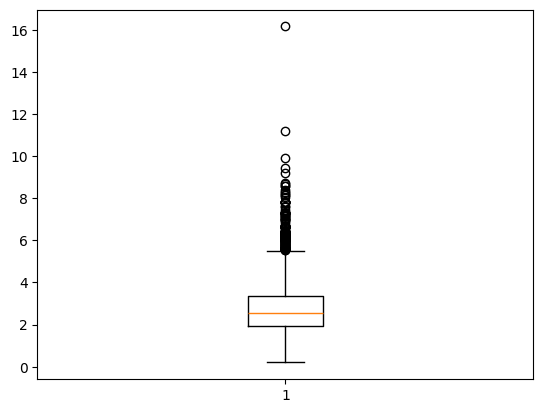

In [16]:
box = plt.boxplot(files_df['len_per_slice'])

In [17]:
force_max_len = math.ceil(boxplot_stats(files_df['len_per_slice'])[0]['whishi'])
force_max_len

6

In [18]:
def compute_len(samp_rate=22050, time=force_max_len, acquisition_mode=0):
    '''Computes the supposed length of sliced data
        samp_size = sample size from the data
        samp_rate = sampling rate. by default since we're working on 24-bit files, we'll use 96kHz
        time = length of time for the audio file. by default we'll use the max we have which is 5.48
        acquisition_mode = either mono or stereo. 0 for mono, 1 for stereo
    '''
    comp_len = 0
    if acquisition_mode == 1: #ac mode is single channel which means it's 'mono'
        comp_len = samp_rate * time
    else: #stereo
        comp_len = (samp_rate * time) * 2

    return comp_len

In [19]:
os.makedirs('output')

In [22]:
diag_file_path = '../root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2/demographic_info.txt'
with open(diag_file_path, 'r') as f:
    for i in range(10):  # Read and print the first 10 lines
        line = f.readline()
        print(line.strip())


101 3 F NA 19 99
102 0.75 F NA 9.8 73
103 70 F 33 NA NA
104 70 F 28.47 NA NA
105 7 F NA 32 135
106 73 F 21 NA NA
107 75 F 33.7 NA NA
108 3 M NA NA NA
109 84 F 33.53 NA NA


In [ ]:
!ls

In [23]:
!ls '../content/output'

In [24]:
!pip install -q split_folders

In [ ]:
!pip install split_folders

In [ ]:
import splitfolders
import os


In [25]:

os.makedirs('output/train')
os.makedirs('output/val')


In [26]:
import os

audio_loc = '../content/output'
print(os.path.abspath(audio_loc))
print(os.path.exists(audio_loc))
print(os.listdir(audio_loc))


/content/output
True
['train', 'val']


In [30]:
import os
import shutil
import pandas as pd
from tqdm import tqdm  # progress bar (pip install tqdm)

# Define the source directory where the original audio files are located
audio_source_loc = '../root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files'

# Define the CSV or DataFrame that contains file info
# Replace this with your actual DataFrame name (not unique version)
# Example: all_files_info = pd.read_csv('file_info.csv')
# If you already have a DataFrame variable, just use it below.
all_files_info = files_df  # <-- replace with your full DataFrame variable

# Define the base output directory
output_base_dir = 'output_all'
os.makedirs(output_base_dir, exist_ok=True)

# Get unique diagnosis labels (for creating folders)
unique_diagnoses = all_files_info['diagnosis'].dropna().unique()

# Create subdirectories for each diagnosis
for d in unique_diagnoses:
    diagnosis_dir = str(int(d))
    os.makedirs(os.path.join(output_base_dir, diagnosis_dir), exist_ok=True)

print(f"Created {len(unique_diagnoses)} diagnosis folders.")

# Copy all audio files, not just unique ones
copied, missing, errors = 0, 0, 0

print("\nStarting file organization for all files...\n")

for _, row in tqdm(all_files_info.iterrows(), total=len(all_files_info)):
    filename = str(row['filename']).strip()
    diagnosis = row['diagnosis']

    if pd.isna(diagnosis):
        continue

    src = os.path.join(audio_source_loc, f"{filename}.wav")
    dst_dir = os.path.join(output_base_dir, str(int(diagnosis)))
    dst = os.path.join(dst_dir, f"{filename}.wav")

    if not os.path.exists(src):
        missing += 1
        continue

    try:
        shutil.copyfile(src, dst)
        copied += 1
    except Exception as e:
        errors += 1
        print(f"Error copying {src}: {e}")

print("\n✅ File organization completed!")
print(f"Total rows processed: {len(all_files_info)}")
print(f"Successfully copied files: {copied}")
print(f"Missing files: {missing}")
print(f"Copy errors: {errors}")


Created 32 diagnosis folders.

Starting file organization for all files...



100%|██████████| 6898/6898 [00:12<00:00, 571.11it/s]


✅ File organization completed!
Total rows processed: 6898
Successfully copied files: 726
Missing files: 0
Copy errors: 0


In [31]:
import os

base_split_dir = 'split_data'

train_path = os.path.join(base_split_dir, 'train')
val_path   = os.path.join(base_split_dir, 'val')

print("Train path:", train_path)
print("Validation path:", val_path)


Train path: split_data/train
Validation path: split_data/val


In [32]:
import os

base_split_dir = 'split_data'

paths = {
    "train": os.path.join(base_split_dir, "train"),
    "val": os.path.join(base_split_dir, "val")
}

print(paths)


{'train': 'split_data/train', 'val': 'split_data/val'}


In [33]:
import librosa as lb
from librosa.display import specshow

import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

import pandas as pd

In [35]:
import pandas as pd

diagnosis_csv = '../root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2/demographic_info.txt'

# Read using flexible whitespace delimiter
diagnosis = pd.read_csv(
    diagnosis_csv,
    delim_whitespace=True,
    names=['pId', 'age', 'sex', 'bmi', 'column_NA', 'diagnosis']
)

# Keep only relevant columns
diagnosis = diagnosis[['pId', 'diagnosis']]

print(diagnosis.head())
print("\nUnique diagnosis categories:\n", diagnosis['diagnosis'].unique())


   pId  diagnosis
0  101       99.0
1  102       73.0
2  103        NaN
3  104        NaN
4  105      135.0

Unique diagnosis categories:
 [ 99.   73.    nan 135.   64.   94.  170.  125.   80.   98.  119.   97.
 110.  104.   68.  100.   70.   74.  183.  103.   85.   86.4 133.  136.
  71.   86.   87.   92.  117.   76.  118.   78.  143. ]


/tmp/ipython-input-2137134738.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  diagnosis = pd.read_csv(


In [36]:
with open('../root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2/demographic_info.txt') as f:
    for i in range(10):
        print(f.readline().strip())



101 3 F NA 19 99
102 0.75 F NA 9.8 73
103 70 F 33 NA NA
104 70 F 28.47 NA NA
105 7 F NA 32 135
106 73 F 21 NA NA
107 75 F 33.7 NA NA
108 3 M NA NA NA
109 84 F 33.53 NA NA


In [37]:
import pandas as pd
import numpy as np

# Path to your demographic info file
diagnosis_csv = '../root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2/demographic_info.txt'

# Load the file properly
diagnosis = pd.read_csv(
    diagnosis_csv,
    sep=r'\s+',
    header=None,
    names=['pId', 'age', 'sex', 'bmi', 'column_NA', 'diagnosis'],
    na_values=['NA'],
    engine='python'
)

# Step 1: Convert diagnosis numbers to readable names (as before)
diagnosis_mapping = {
    99: 'URTI',
    73: 'Healthy',
    135: 'Asthma',
    64: 'COPD',
    94: 'LRTI',
    170: 'Bronchiectasis',
    125: 'Pneumonia',
    80: 'Bronchiolitis'
}
diagnosis['diagnosis'] = diagnosis['diagnosis'].map(diagnosis_mapping)

# Step 2: Fill missing numeric columns (age, bmi, column_NA) with mean
for col in ['age', 'bmi', 'column_NA']:
    if diagnosis[col].dtype in [np.float64, np.int64]:
        mean_val = diagnosis[col].mean(skipna=True)
        diagnosis[col].fillna(mean_val, inplace=True)

# Step 3: Fill missing categorical columns (sex) with forward then backward fill
diagnosis['sex'] = diagnosis['sex'].fillna(method='ffill').fillna(method='bfill')

# Step 4: Optionally fill diagnosis forward/backward (only if you want to avoid NaN)
# Be careful — only do this if rows correspond to the same patient group
diagnosis['diagnosis'] = diagnosis['diagnosis'].fillna(method='ffill').fillna(method='bfill')

# Step 5: Print the cleaned data
print("✅ Cleaned Data Preview:\n", diagnosis.head(15))
print("\n✅ Remaining NA counts per column:\n", diagnosis.isna().sum())

print("\n✅ Unique diagnosis categories:\n", diagnosis['diagnosis'].unique())


✅ Cleaned Data Preview:
     pId    age sex    bmi  column_NA diagnosis
0   101   3.00   F  27.19  19.000000      URTI
1   102   0.75   F  27.19   9.800000   Healthy
2   103  70.00   F  33.00  21.361136   Healthy
3   104  70.00   F  28.47  21.361136   Healthy
4   105   7.00   F  27.19  32.000000    Asthma
5   106  73.00   F  21.00  21.361136    Asthma
6   107  75.00   F  33.70  21.361136    Asthma
7   108   3.00   M  27.19  21.361136    Asthma
8   109  84.00   F  33.53  21.361136    Asthma
9   110  75.00   M  25.21  21.361136    Asthma
10  111  63.00   M  28.40  21.361136    Asthma
11  112  60.00   M  22.86  21.361136    Asthma
12  113  58.00   M  28.41  21.361136    Asthma
13  114  77.00   M  23.12  21.361136    Asthma
14  115   0.58   M  27.19   7.140000      COPD

✅ Remaining NA counts per column:
 pId          0
age          0
sex          0
bmi          0
column_NA    0
diagnosis    0
dtype: int64

✅ Unique diagnosis categories:
 ['URTI' 'Healthy' 'Asthma' 'COPD' 'LRTI' 'Bronchiec

/tmp/ipython-input-2411709121.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diagnosis[col].fillna(mean_val, inplace=True)
/tmp/ipython-input-2411709121.py:37: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diagnosis['sex'] = diagnosis['sex'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2411709121.py:41: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or 

In [38]:
categories = diagnosis['diagnosis'].unique()
categories

array(['URTI', 'Healthy', 'Asthma', 'COPD', 'LRTI', 'Bronchiectasis',
       'Pneumonia', 'Bronchiolitis'], dtype=object)

In [39]:
for cat in categories:
    os.makedirs('output/train/' + cat)
    os.makedirs('output/val/' + cat)

In [40]:
def is_wav(filename):
    '''
        Checks if files are .wav files
        Utility tool in converting wav to png files
    '''
    return filename.split('.')[-1] == 'wav'

In [41]:
import os
import librosa as lb
import librosa.display
import matplotlib.pyplot as plt

def convert_to_spec_image(file_loc, filename, category, is_train=True, verbose=False):
    """
    Converts an audio file to a spectrogram image and saves it.

    Args:
        file_loc (str): Base directory containing train/val folders.
        filename (str): Audio file name (e.g., "sample.wav").
        category (str): Class/category folder name.
        is_train (bool): True if from training data, False if from validation.
        verbose (bool): If True, prints progress messages.
    """
    # Define paths
    subdir = 'train' if is_train else 'val'
    input_path = os.path.join(file_loc, subdir, category, filename)

    if verbose:
        print(f"Reading and converting: {input_path}")

    # Load audio file
    y, sr = lb.load(input_path, sr=None)

    # Generate spectrogram
    plt.figure(figsize=(10, 3))
    src_ft = lb.stft(y)
    src_db = lb.amplitude_to_db(abs(src_ft))
    lb.display.specshow(src_db, sr=sr, x_axis='time', y_axis='hz')
    plt.ylim(0, 5000)

    # Build output path
    save_directory = os.path.join('output', subdir, category)
    os.makedirs(save_directory, exist_ok=True)

    filename_img = os.path.splitext(filename)[0] + '.png'
    save_path = os.path.join(save_directory, filename_img)

    # Save image
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

    if verbose:
        print(f"✅ Saved: {save_path}")

    return save_path


In [46]:
split = ['train', 'val']
files_loc = 'output/' # Define the base location of the split data

for s in split:
    for cat in categories:
        print('-' * 100)
        print('working on ' + cat + '...')
        print('-' * 100)

        files = [f for f in listdir(files_loc + s + '/' + cat + '/') if isfile(join(files_loc + s + '/' + cat + '/', f)) and is_wav(f)]
        for f in files:
            # Code to process each file would go here
            pass # Placeholder

----------------------------------------------------------------------------------------------------
working on train split, category: URTI...
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
working on train split, category: Healthy...
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
working on train split, category: Asthma...
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
working on train split, category: COPD...
----------------------------------------------------------------------------------------------------
-------------------

In [47]:
pip install tensorflow

In [48]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics

from sklearn.utils import class_weight
from collections import Counter

import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

import pandas as pd

In [49]:
train_loc = '/root/.cache/kagglehub/datasets/danaelisanicolas/specimages/versions/1/train'
test_loc = '/root/.cache/kagglehub/datasets/danaelisanicolas/specimages/versions/1/val'

In [50]:
import os

base_split_dir = 'split_data'

train_dir = os.path.join(base_split_dir, 'train')
val_dir   = os.path.join(base_split_dir, 'val')

print("Train dataset path:", train_dir)
print("Validation dataset path:", val_dir)


Train dataset path: split_data/train
Validation dataset path: split_data/val


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("danaelisanicolas/specimages")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/danaelisanicolas/specimages/versions/1


In [52]:
import os

base_dir = '/root/.cache/kagglehub/datasets/danaelisanicolas/specimages/versions/1'

train_path = os.path.join(base_dir, 'train')
val_path   = os.path.join(base_dir, 'val')

print("Train path:", train_path)
print("Validation path:", val_path)


Train path: /root/.cache/kagglehub/datasets/danaelisanicolas/specimages/versions/1/train
Validation path: /root/.cache/kagglehub/datasets/danaelisanicolas/specimages/versions/1/val


In [53]:
# Assuming 'path' variable from kagglehub.dataset_download in cell 1yBk2qG1SFsr holds the base path
# If the variable name is different, please update 'path' below accordingly.
base_dataset_path = path # Use the path variable from cell 1yBk2qG1SFsr
split_subdir = 'train_test_split' # Add the subdirectory name

train_dir = os.path.join(base_dataset_path, split_subdir, 'train')
test_dir = os.path.join(base_dataset_path, split_subdir, 'val')


trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory=train_dir, target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory=test_dir, target_size=(224,224))

Found 5515 images belonging to 8 classes.
Found 1383 images belonging to 8 classes.


In [54]:
import os

downloaded_path = '/kaggle/input/specimages'

print(f"Contents of '{downloaded_path}':")
if os.path.exists(downloaded_path):
    print(os.listdir(downloaded_path))
else:
    print("Downloaded dataset path not found.")

Contents of '/kaggle/input/specimages':
Downloaded dataset path not found.


In [55]:
final_diagnosis_path = 'cleaned_patient_diagnosis.csv'
diagnosis[['pId', 'diagnosis']].to_csv(final_diagnosis_path, index=False)
print("Saved cleaned diagnosis file to:", final_diagnosis_path)


Saved cleaned diagnosis file to: cleaned_patient_diagnosis.csv


In [56]:
import pandas as pd
import numpy as np

# Correct file path
diagnosis_csv = '../root/.cache/kagglehub/datasets/vbookshelf/respiratory-sound-database/versions/2/demographic_info.txt'

# Properly load with regex for variable spaces
diagnosis = pd.read_csv(
    diagnosis_csv,
    sep=r'\s+',             # one or more spaces
    header=None,            # no header in file
    names=['pId', 'age', 'sex', 'bmi', 'column_NA', 'diagnosis'],  # assign correct columns
    na_values=['NA'],       # treat "NA" as missing
    engine='python'
)

print(diagnosis.head(10))


   pId    age sex    bmi  column_NA  diagnosis
0  101   3.00   F    NaN       19.0       99.0
1  102   0.75   F    NaN        9.8       73.0
2  103  70.00   F  33.00        NaN        NaN
3  104  70.00   F  28.47        NaN        NaN
4  105   7.00   F    NaN       32.0      135.0
5  106  73.00   F  21.00        NaN        NaN
6  107  75.00   F  33.70        NaN        NaN
7  108   3.00   M    NaN        NaN        NaN
8  109  84.00   F  33.53        NaN        NaN
9  110  75.00   M  25.21        NaN        NaN


In [58]:
diagnosis_mapping = {
    99: 'URTI',
    73: 'Healthy',
    135: 'Asthma',
    64: 'COPD',
    94: 'LRTI',
    170: 'Bronchiectasis',
    125: 'Pneumonia',
    80: 'Bronchiolitis'
}

diagnosis['diagnosis'] = diagnosis['diagnosis'].map(diagnosis_mapping)

# Fill missing numeric columns
for col in ['age', 'bmi', 'column_NA']:
    diagnosis[col] = diagnosis[col].fillna(diagnosis[col].mean())

# Fill missing categorical
diagnosis['sex'] = diagnosis['sex'].fillna(method='ffill').fillna(method='bfill')
diagnosis['diagnosis'] = diagnosis['diagnosis'].fillna(method='ffill').fillna(method='bfill')

print("✅ Cleaned data preview:")
print(diagnosis.head(10))


✅ Cleaned data preview:
   pId    age sex    bmi  column_NA diagnosis
0  101   3.00   F  27.19  19.000000      URTI
1  102   0.75   F  27.19   9.800000   Healthy
2  103  70.00   F  33.00  21.361136   Healthy
3  104  70.00   F  28.47  21.361136   Healthy
4  105   7.00   F  27.19  32.000000    Asthma
5  106  73.00   F  21.00  21.361136    Asthma
6  107  75.00   F  33.70  21.361136    Asthma
7  108   3.00   M  27.19  21.361136    Asthma
8  109  84.00   F  33.53  21.361136    Asthma
9  110  75.00   M  25.21  21.361136    Asthma


/tmp/ipython-input-2755993084.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diagnosis['sex'] = diagnosis['sex'].fillna(method='ffill').fillna(method='bfill')
/tmp/ipython-input-2755993084.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  diagnosis['diagnosis'] = diagnosis['diagnosis'].fillna(method='ffill').fillna(method='bfill')


In [57]:
categories = diagnosis['diagnosis'].unique()
categories

array([ 99. ,  73. ,   nan, 135. ,  64. ,  94. , 170. , 125. ,  80. ,
        98. , 119. ,  97. , 110. , 104. ,  68. , 100. ,  70. ,  74. ,
       183. , 103. ,  85. ,  86.4, 133. , 136. ,  71. ,  86. ,  87. ,
        92. , 117. ,  76. , 118. ,  78. , 143. ])

In [59]:
vgg16 = VGG16(weights='imagenet')
vgg16.summary()

x  = vgg16.get_layer('fc2').output
prediction = Dense(8, activation='softmax', name='predictions')(x)

model = Model(inputs=vgg16.input, outputs=prediction)

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[-20:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name)

Layer 'block1_pool' is trainable
Layer 'block2_conv1' is trainable
Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten' is trainable
Layer 'fc1' is trainable
Layer 'fc2' is trainable
Layer 'predictions' is trainable


In [61]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer=opt, loss=categorical_crossentropy,
              metrics=['accuracy', 'mae'])
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 8)              │        32,776 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,293,320 (512.29 MB)

 Trainable params: 134,254,600 (512.14 MB)

 Non-trainable params: 38,720 (151.25 KB)

In [62]:
checkpoint = ModelCheckpoint("vgg16_base_res.h5", monitor='val_accuracy', verbose=1,
                             save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

In [63]:
counter = Counter(traindata.classes)
max_val = float(max(counter.values()))
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights

{np.int32(0): 1149.0,
 np.int32(1): 55.373493975903614,
 np.int32(2): 35.90625,
 np.int32(3): 1.0,
 np.int32(4): 17.883268482490273,
 np.int32(5): 183.84,
 np.int32(6): 20.157894736842106,
 np.int32(7): 23.690721649484537}

In [64]:
hist = model.fit(traindata, steps_per_epoch=traindata.samples//traindata.batch_size, validation_data=testdata,
                 class_weight=class_weights, validation_steps=testdata.samples//testdata.batch_size,
                 epochs=110,callbacks=[checkpoint,early])

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/110


KeyboardInterrupt: 

In [2]:
pip install tensorflow

✅ Training data directory: /root/.cache/kagglehub/datasets/danaelisanicolas/specimages/versions/1/train_test_split/train
✅ Validation data directory: /root/.cache/kagglehub/datasets/danaelisanicolas/specimages/versions/1/train_test_split/val
Found 5515 images belonging to 8 classes.
Found 1383 images belonging to 8 classes.

📊 Number of classes detected: 8
📁 Class labels: ['Asthma', 'Bronchiectasis', 'Bronchiolitis', 'COPD', 'Healthy', 'LRTI', 'Pneumonia', 'URTI']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

🚀 Training Simple CNN ...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 682s 4s/step - accuracy: 0.7816 - loss: 1.5600 - val_accuracy: 0.8321 - val_loss: 0.6752
Epoch 2/20
  1/172 ━━━━━━━━━━━━━━━━━━━━ 7:43 3s/step - accuracy: 0.8750 - loss: 0.4830

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


172/172 ━━━━━━━━━━━━━━━━━━━━ 56s 312ms/step - accuracy: 0.8750 - loss: 0.4830 - val_accuracy: 0.8307 - val_loss: 0.6954
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 739s 4s/step - accuracy: 0.8312 - loss: 0.7419 - val_accuracy: 0.8307 - val_loss: 0.7163
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 51s 282ms/step - accuracy: 0.8750 - loss: 0.6247 - val_accuracy: 0.8307 - val_loss: 0.7225
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 699s 4s/step - accuracy: 0.8321 - loss: 0.6864 - val_accuracy: 0.8314 - val_loss: 0.7301
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 82s 463ms/step - accuracy: 0.8125 - loss: 0.8653 - val_accuracy: 0.8307 - val_loss: 0.7283
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 742s 4s/step - accuracy: 0.8337 - loss: 0.6773 - val_accuracy: 0.8307 - val_loss: 0.6317
Epoch 8/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 82s 463ms/step - accuracy: 0.8438 - loss: 0.5141 - val_accuracy: 0.8314 - val_loss: 0.6355
Epoch 9/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 680s 4s/step - accuracy: 0.8232 - loss: 0.6941 - val_accurac

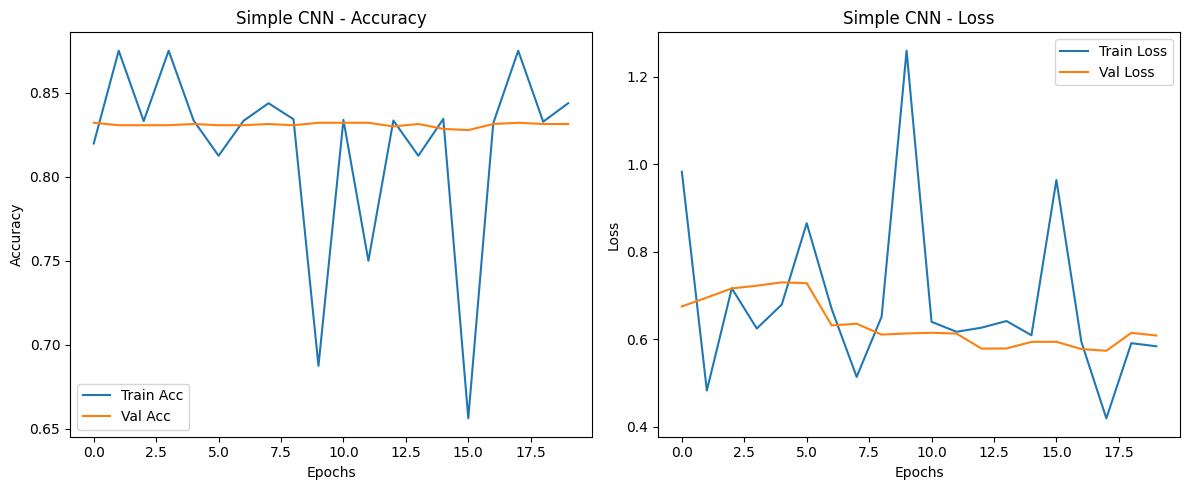

44/44 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step

📊 Classification Report for Simple CNN
                precision    recall  f1-score   support

        Asthma       0.00      0.00      0.00         2
Bronchiectasis       0.00      0.00      0.00        21
 Bronchiolitis       0.00      0.00      0.00        32
          COPD       0.83      1.00      0.91      1150
       Healthy       0.00      0.00      0.00        65
          LRTI       0.00      0.00      0.00         7
     Pneumonia       0.00      0.00      0.00        57
          URTI       0.00      0.00      0.00        49

      accuracy                           0.83      1383
     macro avg       0.10      0.12      0.11      1383
  weighted avg       0.69      0.83      0.76      1383



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


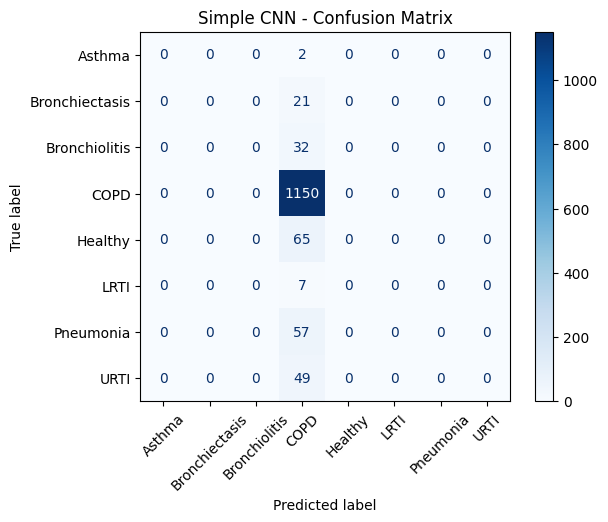

💾 Saved model as Simple_CNN_model.h5

🚀 Training VGG16 ...
Epoch 1/20
 37/172 ━━━━━━━━━━━━━━━━━━━━ 50:11 22s/step - accuracy: 0.6537 - loss: 2.6920

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import os

# =====================================================
# 📂 Load and preprocess data
# =====================================================
# Make sure 'path' variable from kagglehub.dataset_download (cell 1yBk2qG1SFsr) is defined
base_dataset_path = path  # ✅ This should already be set by your previous cell
split_subdir = 'train_test_split'  # Folder containing 'train' and 'val' directories

train_dir = os.path.join(base_dataset_path, split_subdir, 'train')
test_dir = os.path.join(base_dataset_path, split_subdir, 'val')

print(f"✅ Training data directory: {train_dir}")
print(f"✅ Validation data directory: {test_dir}")

# Data augmentation & preprocessing
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_gen = ImageDataGenerator(rescale=1./255)

# Load dataset
traindata = train_gen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

testdata = test_gen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Automatically detect number of classes
num_classes = len(traindata.class_indices)
input_shape = (224, 224, 3)

print(f"\n📊 Number of classes detected: {num_classes}")
print(f"📁 Class labels: {list(traindata.class_indices.keys())}")

# =====================================================
# 📈 Helper function: Plot training curves
# =====================================================
def plot_history(hist, model_name):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(hist.history['accuracy'], label='Train Acc')
    plt.plot(hist.history['val_accuracy'], label='Val Acc')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(hist.history['loss'], label='Train Loss')
    plt.plot(hist.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# =====================================================
# 🧾 Helper function: Evaluate model
# =====================================================
def evaluate_model(model, testdata, model_name):
    y_pred = model.predict(testdata)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true = testdata.classes

    print(f"\n📊 Classification Report for {model_name}")
    print(classification_report(y_true, y_pred_classes, target_names=list(testdata.class_indices.keys())))

    cm = confusion_matrix(y_true, y_pred_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(testdata.class_indices.keys()))
    disp.plot(cmap='Blues', xticks_rotation=45)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.show()

# =====================================================
# 🧠 Model 1: Simple CNN
# =====================================================
def create_simple_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D(2,2),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# =====================================================
# 🧠 Model 2: VGG16 Transfer Learning
# =====================================================

# =====================================================
# 🚀 Train and Compare All Models
# =====================================================
models_to_test = {
    "Simple CNN": create_simple_cnn(input_shape, num_classes),

}

results = {}

for name, model in models_to_test.items():
    print(f"\n🚀 Training {name} ...")
    hist = model.fit(
        traindata,
        validation_data=testdata,
        epochs=20,
        steps_per_epoch=traindata.samples // traindata.batch_size,
        validation_steps=testdata.samples // testdata.batch_size,
        verbose=1
    )

    # Save validation accuracy
    results[name] = hist.history['val_accuracy'][-1]

    # Plot training performance
    plot_history(hist, name)

    # Evaluate model
    evaluate_model(model, testdata, name)

    # Optional: Save model after training
    model.save(f"{name.replace(' ', '_')}_model.h5")
    print(f"💾 Saved model as {name.replace(' ', '_')}_model.h5")

# =====================================================
# 📈 Final Comparison
# =====================================================
print("\n📊 Model Performance Summary:")
for name, acc in results.items():
    print(f"{name}: {acc * 100:.2f}% Validation Accuracy")


In [ ]:
"VGG16": create_vgg16(input_shape, num_classes),
    "ResNet50": create_resnet50(input_shape, num_classes),
    "MobileNetV2": create_mobilenet(input_shape, num_classes)

In [ ]:
def create_vgg16(input_shape, num_classes):
    base = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=input_shape)
    base.trainable = False
    model = models.Sequential([
        base,
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# =====================================================
# 🧠 Model 3: ResNet50 Transfer Learning
# =====================================================
def create_resnet50(input_shape, num_classes):
    base = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base.trainable = False
    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# =====================================================
# 🧠 Model 4: MobileNetV2 Transfer Learning
# =====================================================
def create_mobilenet(input_shape, num_classes):
    base = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)
    base.trainable = False
    model = models.Sequential([
        base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
